In [1]:
###############################################################
#
# Constant pressure or Constant-volume reactor, 
#             adiabatic kinetics simulation.
#              
###############################################################

#import :

import sys
from cantera import *
import numpy as np
import pandas as pd
import csv

In [5]:
#################################################################
# Prepare your run
#################################################################
#Mechanism used for the process
gas = Solution('BFER_methane.yaml', 'CH4_BFER_mix')
gas.TPX = 1000.0, one_atm, {'CH4':1, 'O2':2, 'N2':7.52} 
gas()
# cti = Solution('BFER_methane.yaml')
# air = Solution('air.yaml')

# #Gaseous fuel species
# fuel_species = 'CH4'

# #Number of species in the.cti file.
# m=gas.n_species
# # m=cti.n_spec

# #Find fuel, nitrogen, and oxygen indices
# fuel_species = 'CH4'
# # ifuel = cti.species_index(fuel_species)
# # io2 = cti.species_index('O2')
# # in2 = cti.species_index('N2')
# ifuel = gas.species_index(fuel_species)
# io2 = gas.species_index('O2')
# in2 = gas.species_index('N2')

# if ifuel < 0:
#     raise "fuel species "+fuel_species+" not present!"

# # if cti.n_atoms(fuel_species,'O') > 0 or  cti.n_atoms(fuel_species,'N') > 0:
# #     raise "Error: only hydrocarbon fuels are supported."
# if gas.n_atoms(fuel_species,'O') > 0 or  gas.n_atoms(fuel_species,'N') > 0:
#     raise "Error: only hydrocarbon fuels are supported."


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1.0132e+05 Pa
           density   0.33676 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8664.6        2.3943e+05  J/K
    Gibbs function       -8.0767e+06       -2.2319e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.226
               CH4          0.055187          0.095057           -36.538
                N2           0.72467           0.71483          

In [19]:
#################
#Enter general parameters

	#Stoechiometry
print( "")
print( "-------------------------------------------------------- ")
print( "    THERMO PROPERTIES: ")
print( "-------------------------------------------------------- ")
print( "")
#phi        = input('Enter Stoichiometric ratio phi : ')
#phi        = float(phi)
phi=1
print( "")

		#Air composition
air_N2_O2_ratio = 3.76   
# stoich_O2 = cti.n_atoms(fuel_species,'C') + 0.25*cti.n_atoms(fuel_species,'H')
stoich_O2 = gas.n_atoms(fuel_species,'C') + 0.25*gas.n_atoms(fuel_species,'H')

		#Mass fraction vector
x = np.zeros(m,'d')
x[ifuel] = phi
x[io2] = stoich_O2
x[in2] = stoich_O2*air_N2_O2_ratio


	# Specify intial pressures and temperature of the reactor
#Ti = input('Enter temperature (in kelvin) : ')
#Ti = float(Ti)       # Kelvin
Ti=1000

#Pi = input('Enter pressure (in bar) : ')
#Pi = float(Pi)*1e5         # Pascal
Pi= 1e5

	#Set initial conditions
# cti.TPX = Ti, Pi, x
gas.TPX = Ti, Pi, x




-------------------------------------------------------- 
    THERMO PROPERTIES: 
-------------------------------------------------------- 




In [20]:
gas()


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1e+05 Pa
           density   0.33235 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8668.6        2.3954e+05  J/K
    Gibbs function       -8.0806e+06        -2.233e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.239
               CH4          0.055187          0.095057           -36.551
                N2           0.72467           0.71483           -25.

In [21]:
#################################################################
# Program starts here
#################################################################
#Create the batch reactor
# r   = IdealGasReactor(cti)
r   = IdealGasReactor(gas)


#Specify the conditions: Pression or Volume constant
print ( "--------------------------------------------------- ")
print ( "    Equilibirum conditions: ")
print ( "--------------------------------------------------- ")
print ( "")
print ( "For a constant volume equilibrium, enter :      UV ")
print ( "For a constant pressure equilibrium, enter :    HP ")
print ( "")
#cond  = input('Specify the equilibrium condition : ')
#cond  = str(cond)
cond = "HP"
print ( "")
while cond != 'HP' and cond != 'UV':
     print ( "You must choose between UV and HP !  ")
     cond  = input('Specify the equilibrium condition : ')
     cond  = str(cond)

	#Particular case of a constant-pressure reactor
if cond == 'HP':
	# Define a wall between the reactor and the environment, and
	# make it flexible, so that the pressure in the reactor is held
	# at the environment pressure.
     # env = Reservoir(air)
    env = Reservoir(gas)
    w = Wall(r,env)
    w.expansion_rate_coeff = 1.0e6   # set expansion parameter. dV/dt = KA(P_1 - P_2)
    w.area                 = 1.0       # set wall area


# Now create a reactor network consisting of the single batch reactor
# Reason: the only way to advance reactors in time is through a network
sim = ReactorNet([r])

#################
#Computational properties: we're going to advance the network in time

--------------------------------------------------- 
    Equilibirum conditions: 
--------------------------------------------------- 

For a constant volume equilibrium, enter :      UV 
For a constant pressure equilibrium, enter :    HP 




In [22]:
gas()


  CH4_BFER_mix:

       temperature   1000 K
          pressure   1e+05 Pa
           density   0.33235 kg/m^3
  mean mol. weight   27.633 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.6247e+07  J
   internal energy        2.8706e+05        7.9325e+06  J
           entropy            8668.6        2.3954e+05  J/K
    Gibbs function       -8.0806e+06        -2.233e+08  J
 heat capacity c_p            1340.7             37049  J/K
 heat capacity c_v            1039.8             28734  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2           0.22014           0.19011           -28.239
               CH4          0.055187          0.095057           -36.551
                N2           0.72467           0.71483           -25.

In [23]:
print ("")
print ("-------------------------------------------------------- ")
print ("    COMPUTATIONAL PROPERTIES: ")
print ("-------------------------------------------------------- ")
print ("")
# Initial simulation time
time = 0.0
# Specify the number of time steps
nt = input('Enter number of time steps: ')
nt = int(nt)
# Specify the time step
dtms = input('Enter the time step (in s): ')
dtms = float(dtms)
dt = dtms #s
#################


-------------------------------------------------------- 
    COMPUTATIONAL PROPERTIES: 
-------------------------------------------------------- 



Enter number of time steps:  40000
Enter the time step (in s):  8e-8


In [24]:
# Run the simulation
tim = np.zeros(nt, 'd')
temp = np.zeros(nt, 'd')
press = np.zeros(nt, 'd')
mfrac = np.zeros([nt, m, len(gas.species_names)], 'd')  # Modify this line

# Loop for nt time steps of dt seconds.
data = []  # Create a list to store the data
for n in range(nt):
    time += dt
    sim.advance(time)
    tim[n] = time
    temp[n] = r.T
    press[n] = r.thermo.P
    mfrac_row = [r.thermo[gas.species_name(i)].Y for i in range(m)]
    mfrac[n, :, :] = mfrac_row  # Modify this line
    data.append([sim.time, r.T, r.thermo.P] + mfrac_row)

In [12]:
#################################################################
# Save your results if needed
#################################################################
# write output CSV file for importing into Excel
if cond == 'HP':
     csvfile = 'Reactor_HP.csv'
elif cond == 'UV':
     csvfile = 'Reactor_UV.csv'

csv_file = csvfile
with open(csv_file, 'w') as outfile:
	writer = csv.writer(outfile)
	writer.writerow(['Time','Temperature','Pressure']+gas.species_names)
	for n in range(nt):
    		writer.writerow([tim[n], temp[n], press[n]]+list(mfrac[n,:]))
print ('output written to '+csvfile)


output written to Reactor_HP.csv


In [25]:
gas()


  CH4_BFER_mix:

       temperature   2647.7 K
          pressure   1e+05 Pa
           density   0.12335 kg/m^3
  mean mol. weight   27.155 kg/kmol
   phase of matter   gas

                          1 kg             1 kmol     
                     ---------------   ---------------
          enthalpy        5.8795e+05        1.5966e+07  J
   internal energy       -2.2274e+05       -6.0486e+06  J
           entropy             10221        2.7755e+05  J/K
    Gibbs function       -2.6474e+07        -7.189e+08  J
 heat capacity c_p            1538.7             41783  J/K
 heat capacity c_v            1232.5             33469  J/K

                      mass frac. Y      mole frac. X     chem. pot. / RT
                     ---------------   ---------------   ---------------
                O2          0.020401          0.017313           -33.871
               H2O           0.12394           0.18682           -41.449
               CH4       -2.3749e-14       -4.0198e-14           -7

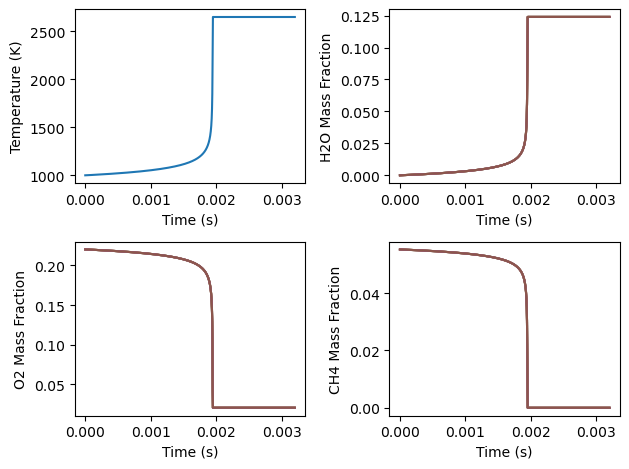

In [26]:
import matplotlib.pyplot as plt

plt.clf()
plt.subplot(2, 2, 1)
plt.plot(tim, temp[:])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')

plt.subplot(2, 2, 2)
plt.plot(tim, mfrac[:, gas.species_index('H2O')])
plt.xlabel('Time (s)')
plt.ylabel('H2O Mass Fraction')

plt.subplot(2, 2, 3)
plt.plot(tim, mfrac[:, gas.species_index('O2')])
plt.xlabel('Time (s)')
plt.ylabel('O2 Mass Fraction')

plt.subplot(2, 2, 4)
plt.plot(tim, mfrac[:, gas.species_index('CH4')])
plt.xlabel('Time (s)')
plt.ylabel('CH4 Mass Fraction')

plt.tight_layout()  # This adjusts the spacing between subplots
plt.show()
